<a href="https://colab.research.google.com/github/vishalrana00007/Netflix-Movies-And-TV-Shows-Machine-Learning-Capstone-Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_MACHINE_LEARNING_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NETFLIX MOVIES AND TV SHOWS CLUSTERING**

**Project Type** - Unsupervised Learning and Recommendation System.

**Contribution** - Individual: VISHAL RANA

# **Project Summary**

In this project, I will develop an Unsupervised Machine Learning model to cluster and analyze a dataset containing information about Netflix shows and movies. The dataset consists of 7787 rows and 12 columns, including features such as **show_id, type, title, cast, country, date added, release_year, rating, duration, listed_in, and description**.

The primary objectives of this project are as follows:

**Data Exploration and Visualization**: Begin by thoroughly exploring and understanding the dataset. Utilize various visualization techniques to extract meaningful insights. Charts and graphs will be generated to illustrate trends and patterns in Netflix content, aiding in hypothesis formulation.

**Hypothesis Testing**: Based on the visualizations, formulate hypotheses about the dataset. Test these hypotheses rigorously to validate assumptions and gain deeper insights into the data.

**Data Preprocessing**: Handle missing values, null entries, and outliers to ensure data quality and integrity. Address any imbalanced data issues by applying appropriate techniques for balancing the dataset.

**Feature Selection and Engineering**: Identify and select relevant features for model training. Conduct feature engineering if necessary to enhance model performance.

**Model Development and Evaluation**: Utilize unsupervised learning techniques such as clustering algorithms to group similar Netflix shows and movies together based on their attributes. Evaluate the performance of the clustering model and interpret the results.

**Final Insights and Recommendations**: Draw conclusions from the analysis and clustering results. Provide insights and recommendations for content creators and viewers based on the identified patterns and clusters within the Netflix dataset.

This project will involve a comprehensive workflow from data exploration to model deployment, aiming to uncover hidden patterns and structures in the Netflix dataset using advanced unsupervised machine learning techniques. The ultimate goal is to deliver actionable insights and knowledge that can inform decision-making and improve content discovery on the Netflix platform.

# **GitHub Link -**

https://github.com/vishalrana00007/Netflix-Movies-And-TV-Shows-Machine-Learning-Capstone-Project

# **Problem Statement -**

This project delves into a treasure trove of information: a dataset capturing the TV shows and movies available on Netflix in 2019. The data originates from Flixable, a third-party search engine for Netflix content.

Intriguingly, a 2018 report revealed a fascinating trend: the number of TV shows on Netflix has skyrocketed nearly threefold since 2010! Conversely, the movie library has shrunk by over 2,000 titles during the same period. This shift begs the question: is Netflix strategically prioritizing television content?

But this dataset holds the potential to unlock far more than just that. By embarking on a voyage of exploratory data analysis (EDA) and Clustering similar content by matching text-based features, we can uncover a wealth of insights:

Global Content Landscape: We can explore the diverse range of content available in different countries, revealing Netflix's approach to catering to regional preferences.

Shifting Focus? We can delve deeper into the trend of TV show proliferation, analyzing if Netflix is indeed prioritizing TV content over movies.

Content Similarities: By harnessing the power of text analysis, we can cluster similar shows and movies based on their descriptions, uncovering hidden connections and thematic trends within the Netflix library.

Furthermore, by integrating this dataset with external sources like IMDB ratings and Rotten Tomatoes scores, we can paint an even richer picture. Imagine – we could identify not just the quantity, but also the quality and popularity of content available in different regions and formats.

This project promises an exciting journey into the ever-evolving world of Netflix content. Let's embark on this exploration and uncover the hidden gems within this treasure trove of data!

# ***Let's Begin !***

# ***1.Know Your Data***

**Importing Libraries**

In [ ]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(file_location, encoding = 'ISO-8859-1')


**Dataset first view**

In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

**Inspecting Dataframe**

In [ ]:
num_rows, num_columns = netflix_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7787
Number of columns: 12


In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Duplicate values**

In [ ]:
duplicate_count = netflix_df.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


**Checking null values**

In [ ]:
# Missing Values/Null Values Count
missing_values_count = netflix_df.isnull().sum()

print(missing_values_count)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


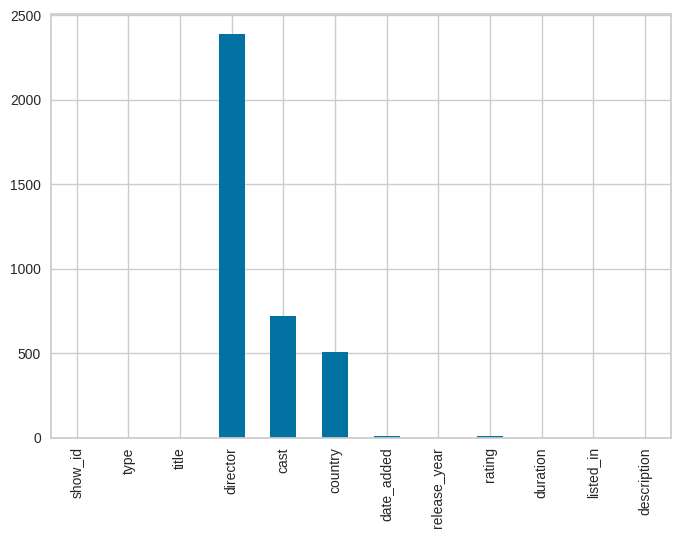

In [ ]:
#Visualizing missing values
netflix_df.isnull().sum().plot.bar()
plt.show()

<Axes: >

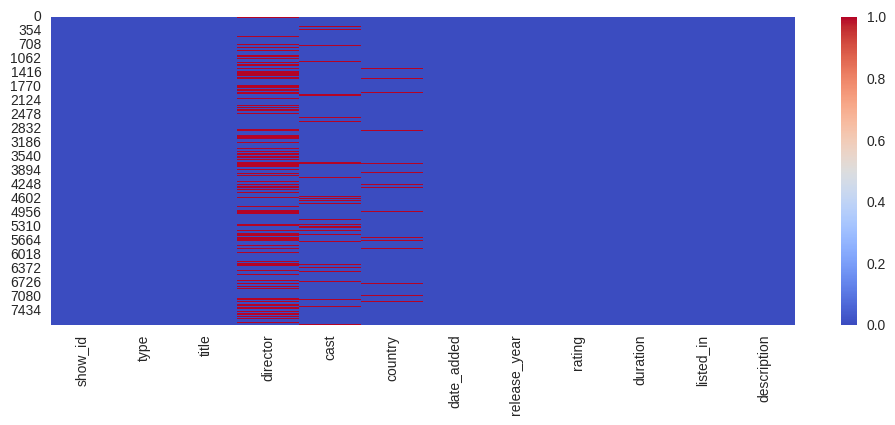

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(netflix_df.isna(), cmap = 'coolwarm')

**Conclusion:** Netflix dataset has 7787 rows and 12 columns.There is no duplicate values but there are missing values in director,cast,country,date_added and ratings columns with highest in director column.

# ***2.Understanding Variables***

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df.describe(include = 'all')

show_id   type title                 director                cast  \
count     7787   7787  7787                     5398                7069   
unique    7787      2  7787                     4049                6831   
top         s1  Movie    3%  RaÃºl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                       18                  18   
mean       NaN    NaN   NaN                      NaN                 NaN   
std        NaN    NaN   NaN                      NaN                 NaN   
min        NaN    NaN   NaN                      NaN                 NaN   
25%        NaN    NaN   NaN                      NaN                 NaN   
50%        NaN    NaN   NaN                      NaN                 NaN   
75%        NaN    NaN   NaN                      NaN                 NaN   
max        NaN    NaN   NaN                      NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

**Variables Description**

**show_id** : Unique ID for every Movie/Show

**type** : Identifier - Movie/Show

**title** : Title of the Movie/Show

**director** : Director of the Movie/Show

**cast** : Actors involved in the Movie/Show

**country** : Country where the Movie/Show was produced

**date_added**: Date it was added on Netflix

**release_year** : Actual Release year of the Movie/Show

**rating** : TV Rating of the Movie/Show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genre

**description** : The Summary description

**Unique Values**

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",netflix_df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


**Conclusion**: I am focusing on several key columns of the dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

By utilizing these features, I plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users.

 This approach will allow me to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

# ***3.Exploratory Data Analysis(EDA)***

What is EDA?

EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.

**4.1 Column: 'type'**

In [ ]:
# number of values of different categories in 'type'
netflix_df['type'].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

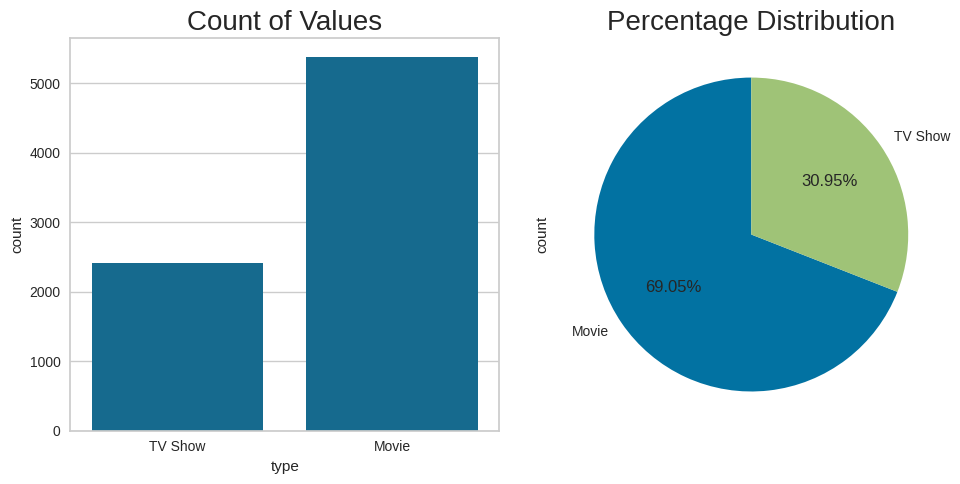

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

# countplot
graph = sns.countplot(x = 'type', data = netflix_df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(10,5),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

**Conclusion:** The above charts reveals a clear preference for movies on Netflix! Movies take center stage, constituting a substantial 69% of the available content. While TV shows hold their own at 31%, it's evident that movies currently dominate the Netflix library.


**4.2 Column: 'title'**

In [ ]:
# number of unique values
netflix_df['title'].nunique()

7787

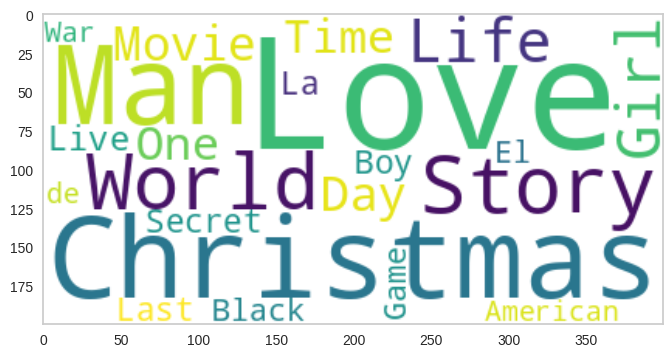

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.grid(False)
plt.show()

**Conclusion:** The wordcloud of Netflix titles unveils some fascinating trends! Words like "Man," "Love," "World," "Story," "Girl," and "Christmas" emerge as recurring themes. These recurring terms hint at the captivating narratives, universal themes, and emotional journeys that resonate with viewers.

**4.3 Column: 'director'**

In [ ]:
print(f'number of unique directors : {netflix_df.director.nunique()}')
print(f'null values in the column : {netflix_df.director.isna().sum()}')

number of unique directors : 4049
null values in the column : 2389


In [ ]:
print(f"Number of TV shows directed by directors are : {netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of Movies directed by directors are : {netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")

Number of TV shows directed by directors are : 184
Number of Movies directed by directors are : 5214


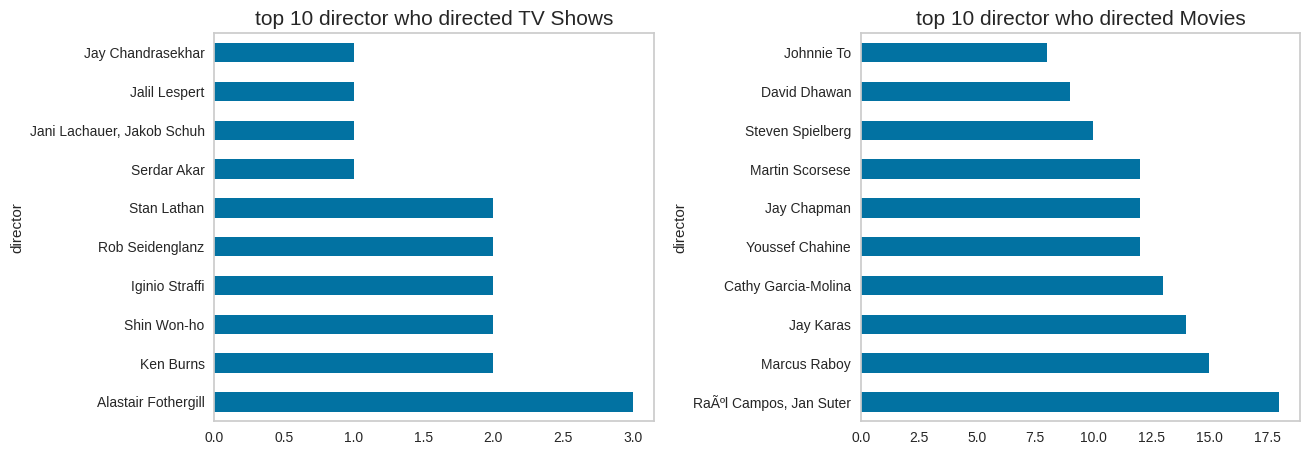

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)
tv_shows.grid(False)

# top 10 directors who directed Movies
movies = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)
movies.grid(False)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Conclusion:** While Alastair Fothergill's directed shows rank highest on the list, Jan Suter and Raul Campos emerge as the most frequent directors overall, each having directed 18 films. This information can be valuable for further analysis.  We could delve deeper into the genres or critical reception of these directors' films to understand their impact and filmmaking styles.

**4.4 Column: 'cast'**

In [ ]:
netflix_df['cast']

0       JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...
1       DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
# seperating actors from cast column
cast = netflix_df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Name: count, Length: 32881, dtype: int64

In [ ]:
print(f"Number of TV Shows actors: {len(netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


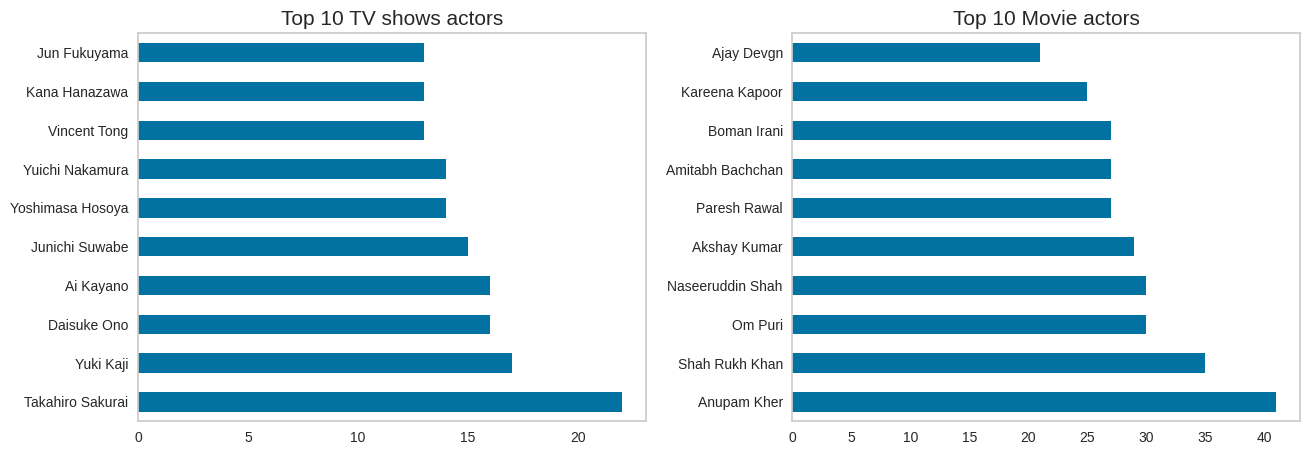

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)
a.grid(False)

# seperating movie actor from cast column
top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)
b.grid(False)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Conclusion:** The above graphs shine a spotlight on the talented actors who bring these movies and shows to life! On the movie front, the data reveals a trio of leading men: Anupam Kher, Shahrukh Khan, and Om Puri. Their frequent appearances suggest they are highly sought-after actors in the film industry.

Meanwhile, the realm of television series boasts its own stellar cast. Takahiro Sakurai, Yuki Kaji, and Daisuke Ono emerge as the most prolific actors, lending their voices to numerous shows. This insight might be particularly interesting for fans of anime or animated content, where voice acting plays a crucial role.

By understanding the actors who consistently grace our screens, we gain a deeper appreciation for the talent that fuels the entertainment industry.

**4.5 Column: 'country'**

In [ ]:
# number of unique values
netflix_df['country'].nunique()

681

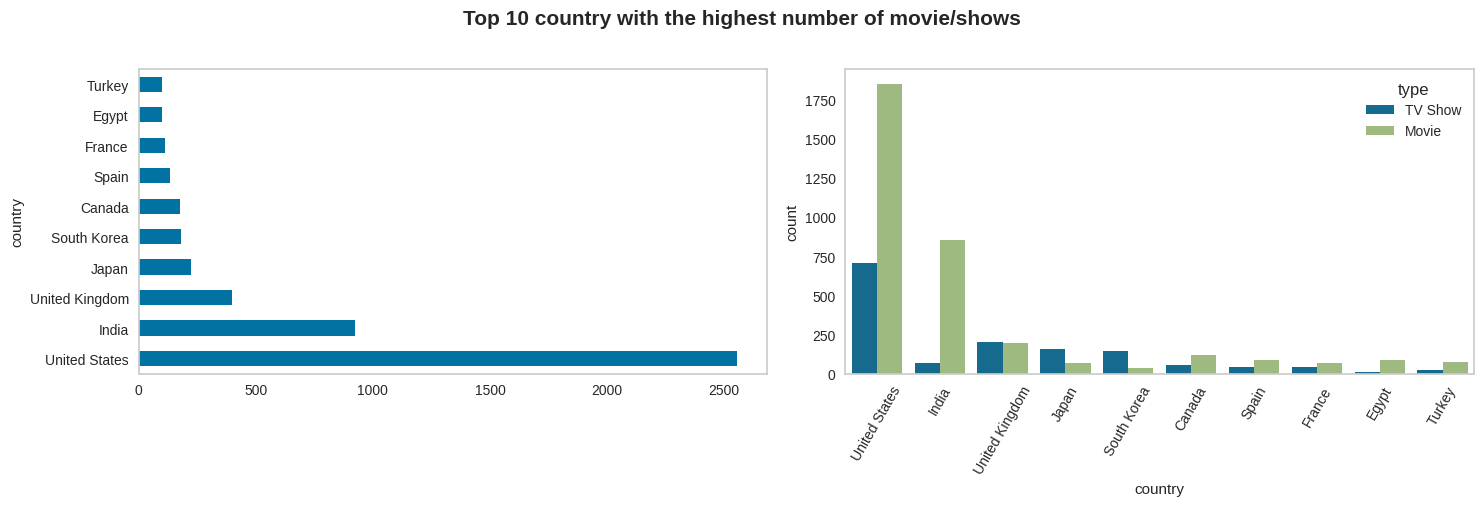

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
netflix_df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])
ax[0].grid(False)  # Remove gridlines for the first plot

# bivariate analysis
graph = sns.countplot(x="country", data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10], ax=ax[1])
ax[1].grid(False)  # Remove gridlines for the second plot
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

**Conclusion:** The above graphs reveal a fascinating landscape of content based on its country of origin. The United States takes the crown for the most produced movies and TV shows, followed closely by India and the United Kingdom.

Interestingly, a trend emerges when we delve deeper. Both India and the United States seem to favor movies, boasting a higher number compared to TV shows. This might suggest a preference for cinematic experiences in these regions.

On the other hand, the United Kingdom, Japan, and South Korea present a contrasting picture. Here, TV shows reign supreme, with a greater number produced compared to movies. This could indicate a thriving television industry or a viewer base with a strong appetite for serialized storytelling in these countries.

By understanding these regional content preferences, Netflix can tailor its offerings to cater to the diverse tastes of its global audience.

**4.6 Column: 'release_year'**

In [ ]:
# number of unique values
netflix_df['release_year'].nunique()

73

In [ ]:
print(f'Oldest release year : {netflix_df.release_year.min()}')
print(f'Latest release year : {netflix_df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


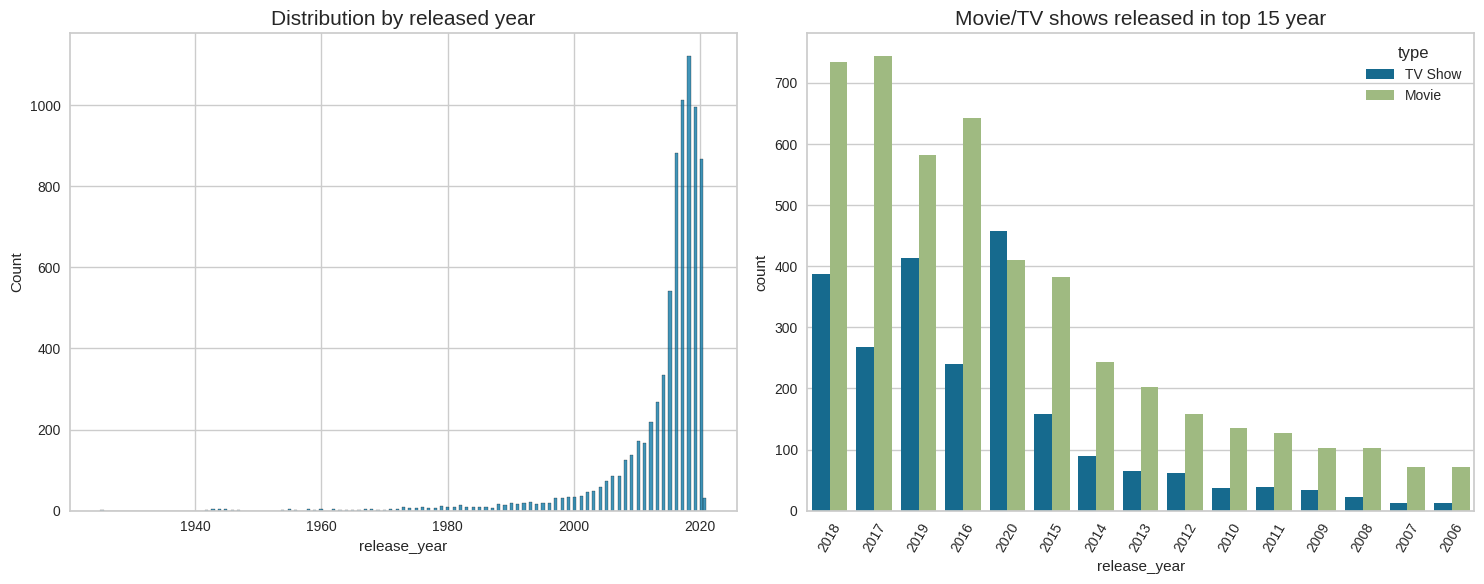

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


**Conclusion**: Above graphs reveal a fascinating trend – Netflix appears to be ramping up its content acquisition in recent years! The data shows a clear focus on adding new movies and TV shows, with the highest number becoming available between 2015 and 2020. This trend culminates in a peak in 2018, suggesting a strategic push to expand the content library during that year.

This surge in content points towards Netflix's commitment to providing viewers with a constantly evolving selection of entertainment. By offering a vast and ever-growing library, Netflix positions itself as a one-stop shop for movie and TV show enthusiasts.

**4.7 Column: 'rating'**

In [ ]:
# number of unique values
netflix_df.rating.nunique()

14

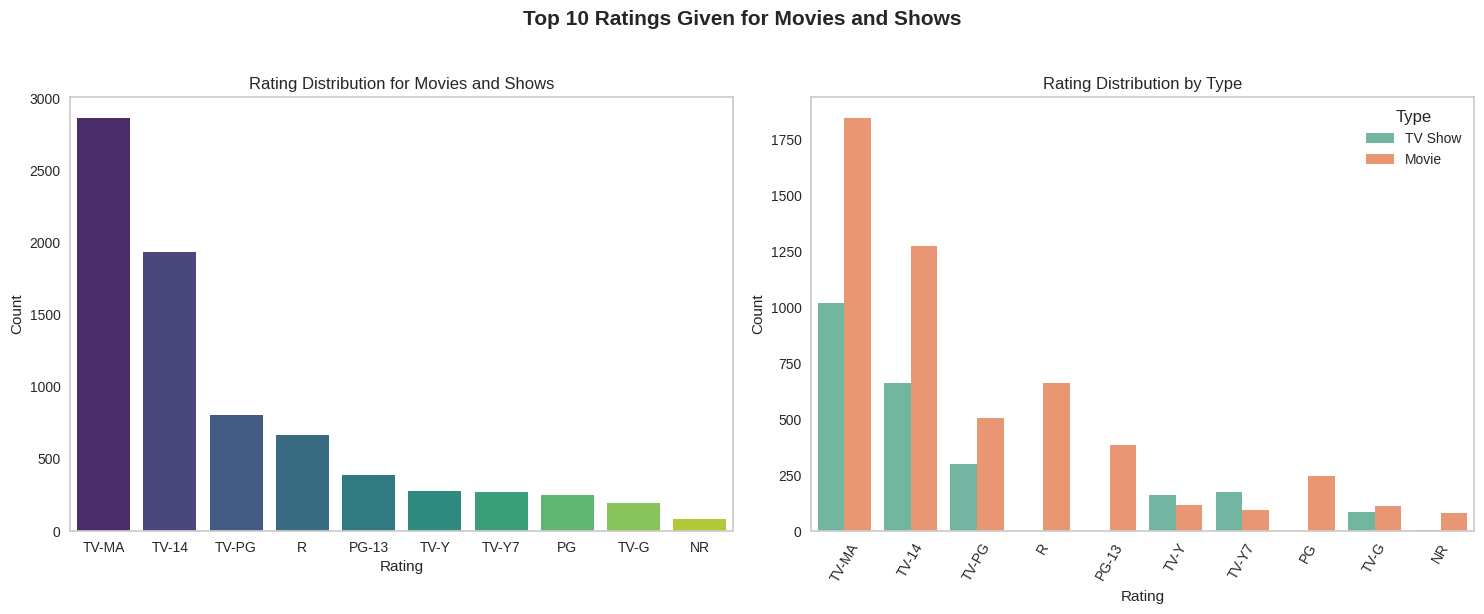

In [ ]:

# Create subplots with specific figure size and title
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 Ratings Given for Movies and Shows', weight='bold', y=1.02, size=15)

# Plotting the first subplot (univariate analysis)
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0], palette='viridis')
ax[0].set_title('Rating Distribution for Movies and Shows')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')
ax[0].grid(False)

# Plotting the second subplot (bivariate analysis)
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1], palette='Set2')
ax[1].set_title('Rating Distribution by Type')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
ax[1].legend(title='Type')
ax[1].grid(False)
ax[1].legend(title='Type')

plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


**Conclusion:** Shedding light on the content rating landscape, our analysis reveals that TV-MA, signifying suitability for mature audiences, reigns supreme. This aligns with the observation of a higher movie count compared to TV shows, as movies often explore themes that might necessitate a more mature rating.

However, the presence of TV-14 ratings, catering to a younger audience, indicates that Netflix offers a diverse range of content suitable for various age groups. This caters to a wider audience and allows families to find content enjoyable for everyone.

By understanding the content rating distribution, Netflix can ensure its library caters to viewers of all ages and interests, fostering a truly inclusive entertainment experience.

**4.8 Column: 'listed_in'**

In [ ]:
netflix_df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

Because this column is a genre column, in order to count the genres, we must separate them.

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

genre  count
0    International Movies   2437
1                  Dramas   2106
2                Comedies   1471
3  International TV Shows   1199
4           Documentaries    786

In [ ]:
# number of genres present in dataset
len(genres)

42

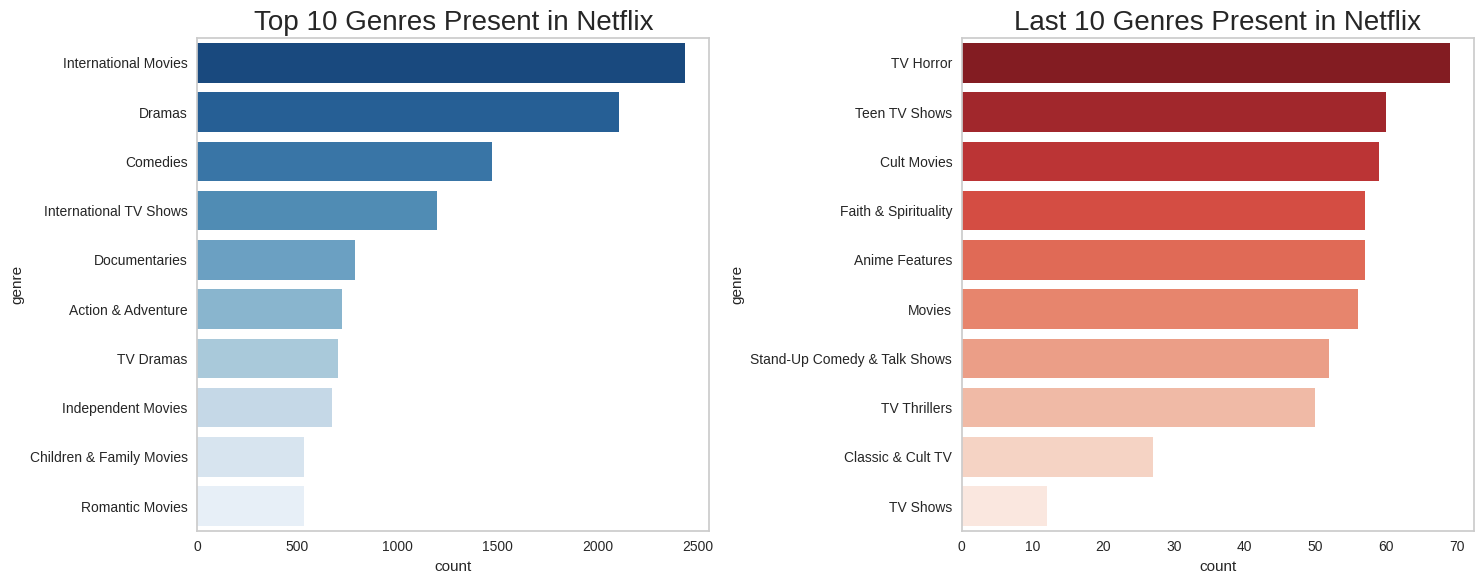

In [ ]:
# Create subplots with specific figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the top 10 genres
top = sns.barplot(y='genre', x='count', data=genres[:10], ax=ax[0], palette='Blues_r')  # Change color palette
top.set_title('Top 10 Genres Present in Netflix', size=20)
ax[0].grid(False)  # Remove grid lines

# Plotting the last 10 genres
bottom = sns.barplot(y='genre', x='count', data=genres[-10:], ax=ax[1], palette='Reds_r')  # Change color palette
bottom.set_title('Last 10 Genres Present in Netflix', size=20)
ax[1].grid(False)  # Remove grid lines

plt.tight_layout()
plt.show()



**Conclusion:** The above graphs of Netflix's genre landscape reveals a captivating mix of categories!  International movies, dramas, and comedies take center stage, constituting the most prevalent genres. This rich tapestry of international content reflects the growing popularity of global storytelling and Netflix's commitment to showcasing diverse voices.

In contrast, TV shows, classic and cult TV, thrillers, stand-up comedy, and talk shows represent a smaller portion of the library. This doesn't diminish their importance, however! These genres cater to specific tastes and offer unique viewing experiences.

By understanding this genre distribution, Netflix can curate its content offerings to cater to a wide range of viewer preferences. Whether you crave international adventures, heartwarming dramas, or side-splitting comedies, Netflix has something for everyone

**4.9 Column: 'description'**

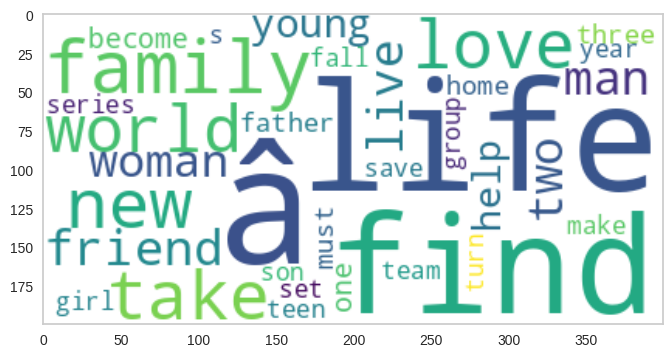

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# creating the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plotting the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.grid(False)
plt.show()

**Conclusion:** The above Wordcloud of  Netflix show descriptions delves into the heart of the content, revealing the emotional themes that resonate most. Words like "family," "find," "life," "love," "new world," and "friend" surface as recurring motifs. These terms paint a picture of the core human experiences that Netflix shows explore – the search for connection, the pursuit of self-discovery, and the enduring value of love and friendship.

This focus on relatable themes suggests Netflix understands the power of storytelling to connect with viewers on a deeper level. By tapping into these universal emotions, Netflix shows can evoke laughter, tears, and everything in between, creating a truly immersive and impactful viewing experience.

**4.10 Column: Duration**

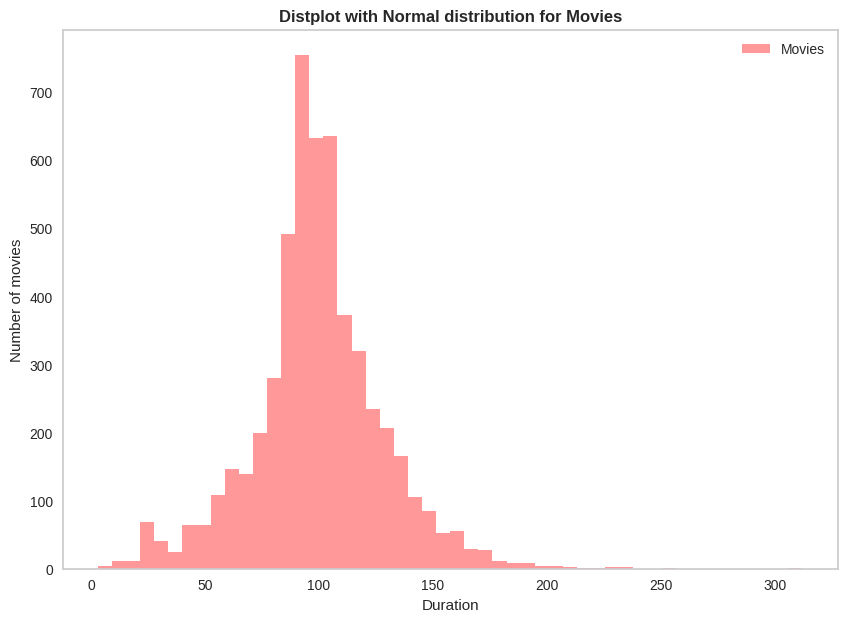

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10, 7))
sns.distplot(netflix_df[netflix_df['type'] == 'Movie']['duration'].str.extract('(\d+)'), kde=False, color='red', label='Movies')
plt.title('Distplot with Normal distribution for Movies', fontweight="bold")
plt.legend()
plt.xlabel('Duration')
plt.ylabel('Number of movies')
plt.grid(False)
plt.show()

**Conclusion:** The above graph of movie durations reveals a fascinating trend! A significant portion of the movies fall within a sweet spot of 50 to 150 minutes. This suggests a preference for movies that offer a compelling story experience without an overwhelming time commitment.

This focus on mid-length films could cater to viewers seeking a satisfying entertainment experience that fits comfortably within their schedules.

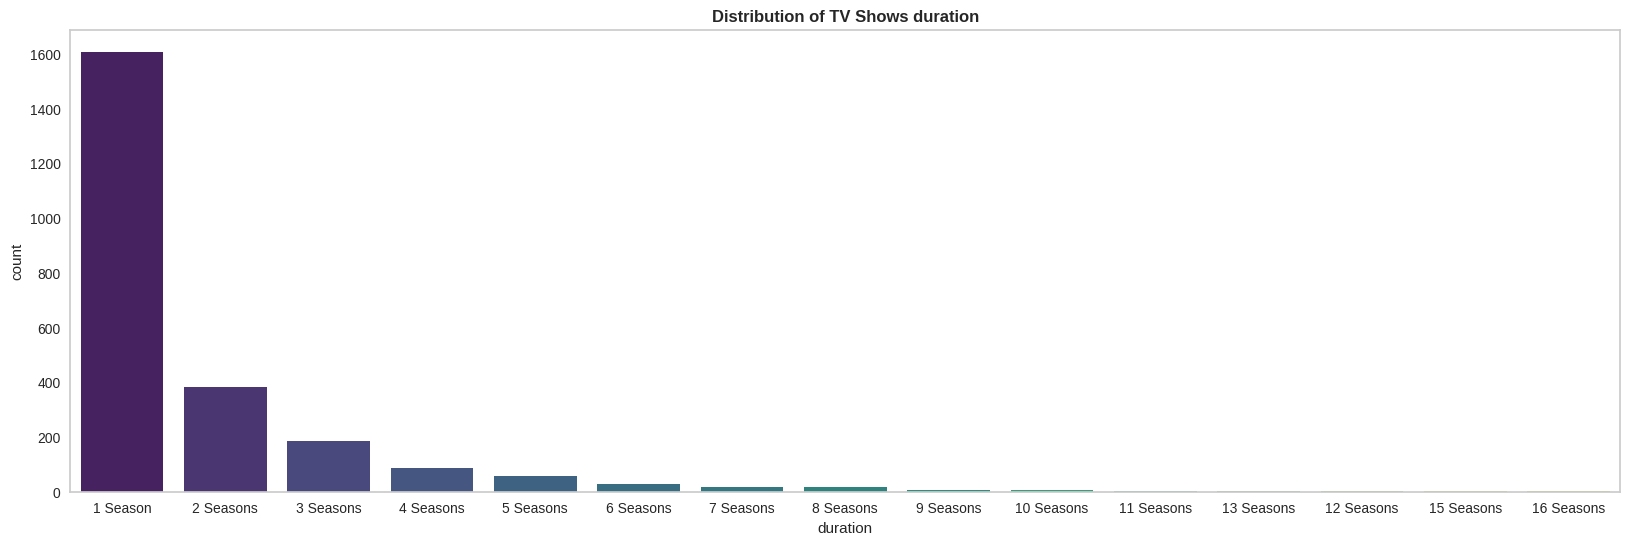

In [ ]:
#Checking the distribution of TV SHOWS
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
plt.figure(figsize=(20, 6))
plt.title("Distribution of TV Shows duration", fontweight='bold')
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index, palette='viridis')  # Added palette parameter
plt.grid(False)
plt.show()

**Conclusion:** The above duration graph of  TV shows reveals a captivating trend – a substantial number consist of just one season! This might indicate a rise in "limited series," shows crafted to tell a complete story within a single season. This format allows creators to explore focused narratives without the open-ended commitment of traditional multi-season shows.

For viewers, single-season shows offer a satisfying viewing experience within a manageable timeframe. They can delve into a compelling story arc without the uncertainty of renewal or the potential commitment of multiple seasons

**Originals:**

In [ ]:
# adding new column
# Convert the 'date_added' column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract year from the date_added column and create a new column 'year_added' in the netflix_df dataframe
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  count  year_added  
0  In a future where the elite inhabit an island ...      1      2020.0  
1  After a devastating earthquake hits Mexico Cit...      1      2016.0  
2  When an army recruit is found dead, his fellow...      1      2018.0  
3  In a postapocalyptic world, rag-doll robots hi...      1      2017.0  
4  A brilliant group of students become card-coun...      1      2020.0

Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Naming those as Netflix Originals.

([<matplotlib.patches.Wedge at 0x7e5c085b2e30>,
 [Text(-0.9993681929016183, -0.45963378358923307, 'Others'),
  Text(1.0902198937479648, 0.5014185709326855, 'Originals')],
 [Text(-0.5451099234008826, -0.250709336503218, '63.72%'),
  Text(0.6359616046863127, 0.2924941663773999, '36.28%')])

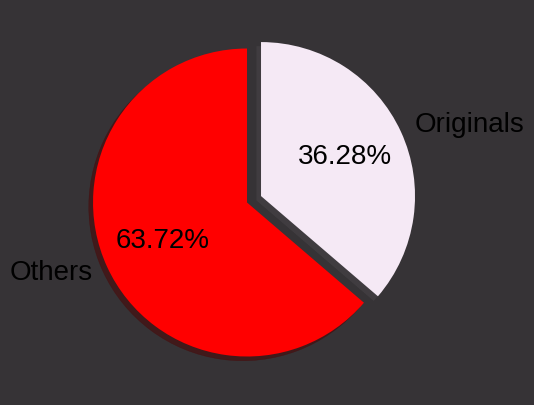

In [ ]:
netflix_df['originals'] = np.where(netflix_df['release_year'] == netflix_df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(netflix_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

**Conclusion:** The above chart reveals a fascinating split in Netflix's movie library. Only around 36% of the movies are brand new releases, directly launched on the platform. This means a substantial 64% of movies were previously released elsewhere.

This trend suggests a strategic mix of fresh content and established favorites. Netflix caters to viewers seeking the thrill of discovery with new releases, while also offering a vast library of familiar films for viewers to revisit or explore for the first time.

**Heatmap:**

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)

In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  count  year_added  \
0  In a future where the elite inhabit an island ...      1      2020.0   
1  After a devastating earthquake hits Mexico Cit...      1      2016.0   
2  When an army recruit is found dead, his fellow...      1      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...      1      2017.0   
4  A brilliant group of students become card-coun...      1      2020.0   

  originals target_ages  
0       Yes      Adults  
1       Yes      Adults  
2        No      Adults  
3        No       Teens  
4        No       Teens

In [ ]:
# type should be a catego
netflix_df['type'] = pd.Categorical(netflix_df['type'])
netflix_df['target_ages'] = pd.Categorical(netflix_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:

# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Kids            0.027322  0.022388        0.093199       0.073276  
Older Kids      0.120219  0.044776        0.204030       0.187696  
Teens           0.382514  0.097015        0.188917       0.237069  
Adults          0.469945  0.835821        0.513854       0.501959

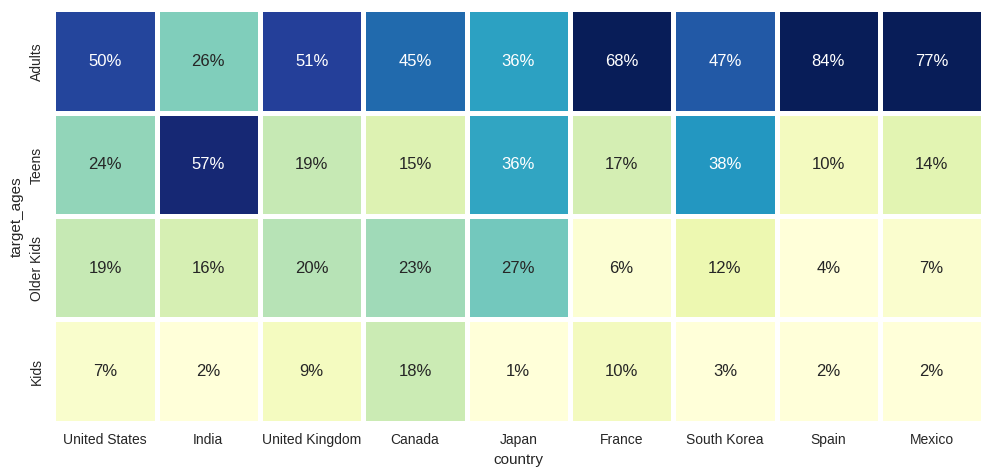

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

**Conclusion:** Across the globe, Netflix caters to a surprising range of age groups. The US and UK share similar target audience preferences, while India and Japan's choices diverge. Interestingly, Mexico and Spain's content aligns closely, suggesting cultural similarities or strategic targeting by Netflix. Understanding these variations is key to providing an international entertainment experience that resonates with viewers worldwide.

## **Making some Hypothesis:**

HO: movies rated for kids and older kids are at least two hours long.

H1: movies rated for kids and older kids are not at least two hours long

In [ ]:
movies = netflix_df[netflix_df['type'] == 'Movie']
movies

show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6       Yasir Al Yasiri  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                 ...                                                ...   
7781       Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7786           Sam Dunn                                                      

                                                country date_added  \
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
6                                                 Egypt 2020-06-01   
...                                                 ...        ...   
7781                                      United States 2020-01-11   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                    2020-09-25   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating duration  \
1             2016  TV-MA   93 min   
2             2011      R   78 min   
3             2009  PG-13   80 min   
4             2008  PG-13  123 min   
6             2019  TV-MA   95 min   
...            ...    ...      ...   
7781          2006     PG   88 min   
7782          2005  TV-MA   99 min   
7783          2015  TV-14  111 min   
7784          2019  TV-MA   44 min   
7786          2019  TV-MA   90 min   

                                              listed_in  \
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
6                   Horror Movies, International Movies   
...                                                 ...   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7786                    Documentaries, Music & Musicals   

                                            description  count  year_added  \
1     After a devastating earthquake hits Mexico Cit...      1      2016.0   
2     When an army recruit is found dead, his fellow...      1      2018.0   
3     In a postapocalyptic world, rag-doll robots hi...   

In [ ]:
#making copy of df_clean_frame
df_hypothesis = netflix_df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  count  year_added  \
0  In a future where the elite inhabit an island ...      1      2020.0   
1  After a devastating earthquake hits Mexico Cit...      1      2016.0   
2  When an army recruit is found dead, his fellow...      1      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...      1      2017.0   
4  A brilliant group of students become card-coun...      1      2020.0   

  originals target_ages  
0       Yes      Adults  
1       Yes      Adults  
2        No      Adults  
3        No       Teens  
4        No       Teens

In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:

#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  count  year_added  \
1  After a devastating earthquake hits Mexico Cit...      1      2016.0   
2  When an army recruit is found dead, his fellow...      1      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...      1      2017.0   

  originals target_ages  
1       Yes      Adults  
2        No      Adults  
3        No       Teens

In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group = group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A['duration'].mean()
S1 = A['duration'].std()

M2= B['duration'].mean()
S2 = B['duration'].std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids 66.48689138576779 
 Mean for  movies rated for older kids 92.02464788732394
Std for  movies rated for Older Kids 31.182576758429978 
 Std for  movies rated for kids 31.739464779840176


In [ ]:
from scipy import stats

# Length of groups and DOF
n1 = len(A)
n2 = len(B)
print("n1:", n1, "n2:", n2)

dof = n1 + n2 - 2
print('Dof:', dof)

# Calculating the pooled variance
sp_squared = ((n1 - 1) * S1 ** 2 + (n2 - 1) * S2 ** 2) / dof
sp = np.sqrt(sp_squared)
print('Pooled variance (sp):', sp)

# Calculating the t-value
t_val = (M1 - M2) / (sp * np.sqrt(1 / n1 + 1 / n2))
print('t-value:', t_val)

n1: 267 n2: 852
Dof: 1117
Pooled variance (sp): 31.31609124296779
t-value: -11.627211617007113


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

**Conclusion:**Since the calculated t-value fell outside the expected range, the null hypothesis is rejected. In simpler terms, the data doesn't support the idea that movies rated for kids and older kids are inherently longer than two hours.

## ***4.Data Cleaning:***

**What is data cleaning?**

Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

**Duplicate Values**

In [ ]:
# counting duplicate values
netflix_df.duplicated().sum()

0

There is no duplicate record in the dataset.

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

**Handling Missing Values**

As we can see that our data isn't perfect – some entries lack information for director, cast, and country. To address this, we'll use "empty strings" as placeholders, ensuring no valuable data points are lost.

For the rating and date added columns, missing values are a rare occurrence. Since removing them won't significantly impact our model, we'll simply get rid of these "nan" values. This ensures a clean and complete dataset ready for analysis!

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Handling Outliers**

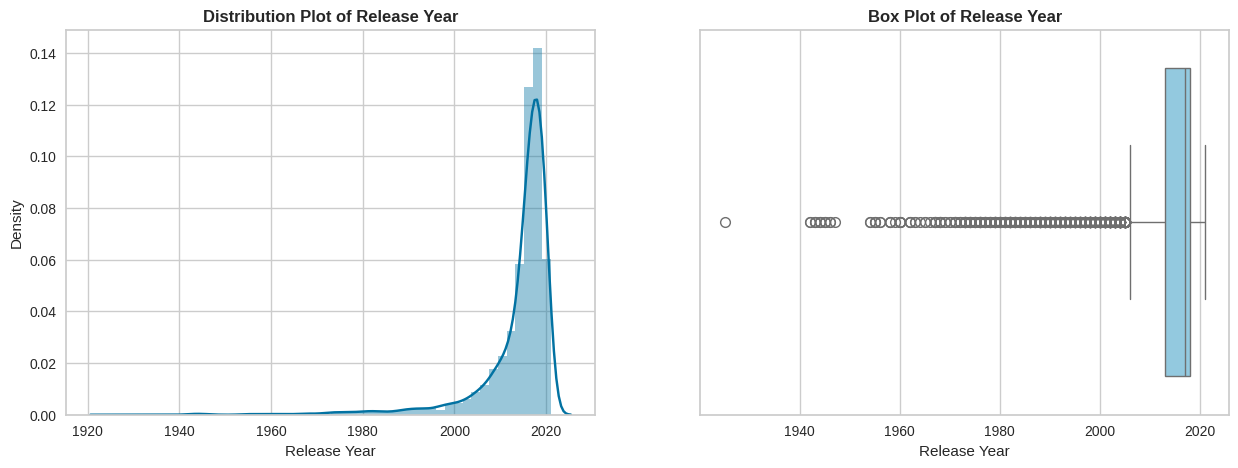

In [ ]:
# Handling Outliers & Outlier treatments

# plotting graph
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Displaying distribution plot in the first subplot
sns.distplot(netflix_df['release_year'], ax=ax[0])
ax[0].set_title('Distribution Plot of Release Year', fontweight='bold')
ax[0].set_xlabel('Release Year')

# Displaying box plot in the second subplot
sns.boxplot(x=netflix_df['release_year'], color='skyblue', ax=ax[1])
ax[1].set_title('Box Plot of Release Year', fontweight='bold')
ax[1].set_xlabel('Release Year')

plt.show()

**Conclusion**: Except for the release year, almost all of the data are presented in text format.

The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

# ***5.Feature Engineering and Data Pre-processing***

### **Textual data preprocessing**

Textual data analysis requires a crucial first step: preprocessing. This involves a series of transformations on raw text to make it cleaner, more organized, and suitable for analysis or machine learning models. Techniques like tokenization (breaking text into words), stop-word removal (eliminating common words like "the"), stemming/lemmatization (reducing words to their root form), and punctuation/number removal are all part of this process. The ultimate goal? To prepare the data for further exploration by removing irrelevant information and ensuring a consistent format across the text. This refined data empowers us to conduct more accurate and effective analysis, unlocking the true meaning hidden within

## **Modeling Approach**



*   Choose the attributes that you want to cluster.
*   **Text Preprocessing:** Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
***Stemming or Lemmatization:** Normalizing the words by reducing them to their base form.
***Tokenization:** Breaking the text into smaller units, such as sentences or words.

* Dimensionality reduction.

* Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.

* Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

**(a)Selecting Attributes:**

In [ ]:
netflix_df.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...     Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...     Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...

We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
Director

* Cast
*Country
*Rating
*Listed in (genres)
*Description





In [ ]:
# creating tags column using all text column which one is used for model building purpose.
netflix_df['text_data'] = netflix_df['director'] + netflix_df['cast'] + netflix_df['country'] + \
                     netflix_df['rating'] + netflix_df['listed_in'] + netflix_df['description']

In [ ]:
# checking the first row
netflix_df['text_data'][0]

' JoÃ£o Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, ZezÃ© Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

Here I successfully integrated all required features into a single column for efficient processing.

**(b)Removing Stop words and Lower Casing:**

Text pre-processing for NLP tasks frequently includes removing stop words and converting all text to lowercase.



*  **Stop words Removal**: Words such as "a," "an," "the," and "is," are words that are commonly used in a language but do not convey much meaning. These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.
*   **Lowercasing**: It is the process of converting all the words in a text to lowercase. This can be useful in tasks such as information retrieval or text classification where case differences are not important and also can reduce the size of the vocabulary making it easier to work with larger texts or texts in languages with a high number of inflected forms.



In [ ]:
# creating a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying stopwords function.
netflix_df['text_data'] = netflix_df['text_data'].apply(stopwords)

In [ ]:
# checking the first row again
netflix_df['text_data'][0]

'joã£o miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezã© motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

As we can see, I have successfully streamlined my data by converting everything to lowercase and removing common words like "the" and "a." This paves the way for clearer analysis!

**(c)Removing Punctuations:**

In the world of NLP, preparing text for analysis often involves removing punctuation marks like periods, commas, and exclamation points. Why? Punctuation generally adds little meaning and can introduce noise into the data. By removing it, we make the text cleaner and easier to work with.    
  This pre-processing step also simplifies tokenization, the process of breaking text into smaller units like words or sentences. Punctuation usually acts as a natural separator between these units. Additionally, removing punctuation can reduce the size of the vocabulary we need to analyze, especially for large datasets or languages with many variations of words. Python libraries like string, re, and nltk offer handy tools to achieve this punctuation purge!

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying remove_punctuation function
netflix_df['text_data'] = netflix_df['text_data'].apply(remove_punctuation)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'joã£o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezã© motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

As we can see, punctuation marks has been eliminated from the corpus.

**(d)Stemming:**

In the realm of NLP, "stemming" takes center stage as a text pre-processing technique. It tackles the task of reducing words to their core, their root form. Why is this important? Stemming ensures words with the same essence are treated equally, even if their grammatical form differs. Imagine transforming "running," "runner," and "ran" all into "run." This simplifies analysis and reduces the number of unique words we need to consider, especially for vast datasets. Python offers a toolbox of stemmers like Porter, Snowball, and Lancaster to achieve this word simplification feat!

Here I will be utilizing SnowballStemmer to construct a meaningful word from a word corpus.                

In [ ]:
# creating an object of stemming function
stemmer = SnowballStemmer("english")

# defining a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
netflix_df['text_data'] = netflix_df['text_data'].apply(stemming)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'joã£o miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezã© motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

As we can see, stemming process has been utilized successfully.

**(e)Text Vectorization:**

Text analysis in machine learning hinges on a crucial step: vectorization. Here, text data sheds its textual cloak and transforms into numerical vectors. Think of it as a language machines understand! These vectors capture the essence of the text, allowing algorithms to analyze and compare  different pieces of content. Popular techniques like Bag of Words, TF-IDF, Word2Vec, and GloVe empower this transformation, paving the way for fascinating explorations in the world of text data.

I will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency

*  TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
*  IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
*The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.



In [ ]:
# creating the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fitting the vectorizer using the text data
tfidf.fit(netflix_df['text_data'])

# collectting the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [ ]:
# converting vector into array form for clustering
vector = tfidf.transform(netflix_df['text_data']).toarray()

# summarizing encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


Here as we can see I have successfully converted texts into numerical form.

**(f)Dimensionality Reduction:**


In machine learning, data can get overloaded with features. Dimensionality reduction tackles this by shrinking the number of features while preserving key information. Imagine a map – dimensionality reduction folds it cleverly, keeping the essential landmarks visible. This simplification benefits machine learning models in several ways: it boosts performance, reduces overfitting (a memorization issue), and allows for clearer data visualization and interpretation. All in all, it's a data-wrangling technique that unlocks a deeper understanding within complex datasets.


*   There are several techniques used for dimensionality reduction, such as: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
*   Here I will be using Principal Component Analysis (PCA) to reduce the dimensionality of data.



In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

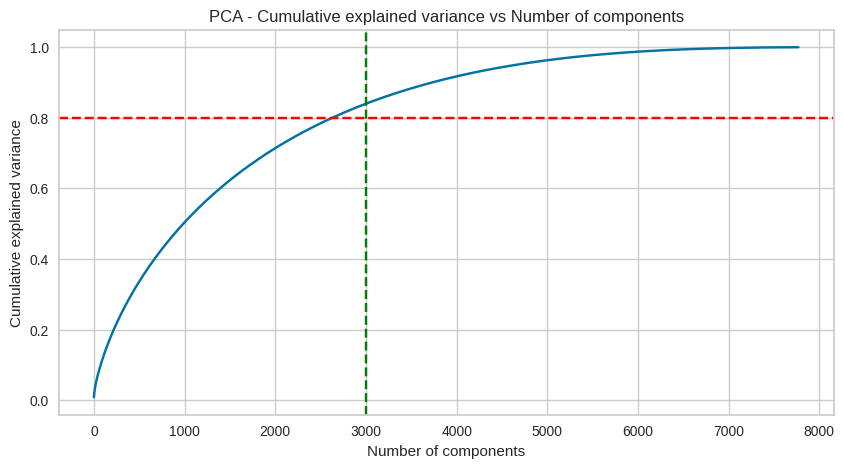

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

**Conclusion** The analysis reveals a fascinating insight! By focusing on just 7,500 components, we can capture the entirety of the data's variance. This means these components encompass all the meaningful variations within the data. Even more compelling, the top 3,000 components alone account for over 80% of this variance.

This presents a strategic opportunity. By selecting the top 3,000 components, we can achieve dimensionality reduction –  reducing the complexity of the data while still preserving the vast majority of its informative content. This simplification translates to a more manageable model that can be trained faster and potentially yield even better results. Essentially, we're striking a balance – reducing complexity without sacrificing significant meaning. This allows us to delve deeper into the data and uncover the hidden patterns that reside within.

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

# ***6.Model Implementation***

## **(a) K-Means Clustering**

Imagine a vast library of movies, a treasure trove waiting to be explored. K-means clustering, a powerful unsupervised learning technique, steps in to help us navigate this landscape. It works by automatically grouping similar movies together, forming distinct clusters.

The magic lies in the "k." This number represents the desired number of clusters, allowing us to tailor the analysis to our specific needs. Each cluster is then represented by a central point, the centroid, which embodies the average characteristics of the movies within that group. By using K-means clustering, we can uncover hidden patterns and relationships within the movie data, providing valuable insights into viewer preferences and content organization.

To ensure I'm grouping movies effectively, I'll leverage the elbow curve and silhouette score to determine the optimal number of clusters for the K-means algorithm

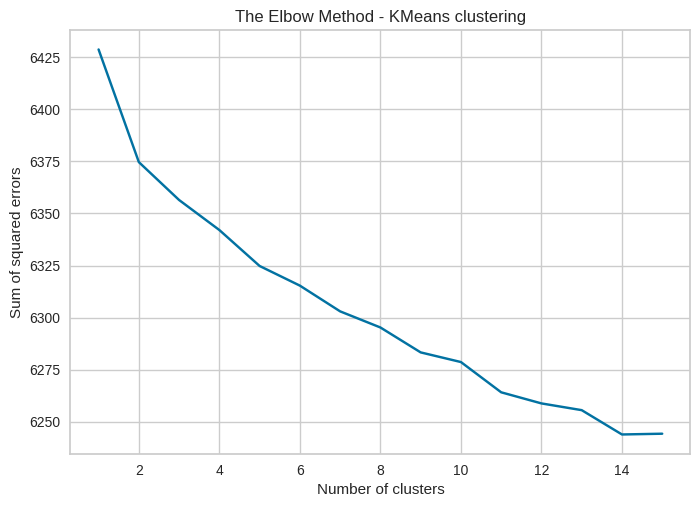

In [ ]:
#Elbow method to find the optimal value of K

# Initializing a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initializing the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fitting the model to the data
  kmeans.fit(X)
  # Computing the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plotting the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

To refine the cluster selection, I'll utilize the silhouette score alongside this elbow curve for a clearer picture of the optimal number of clusters.

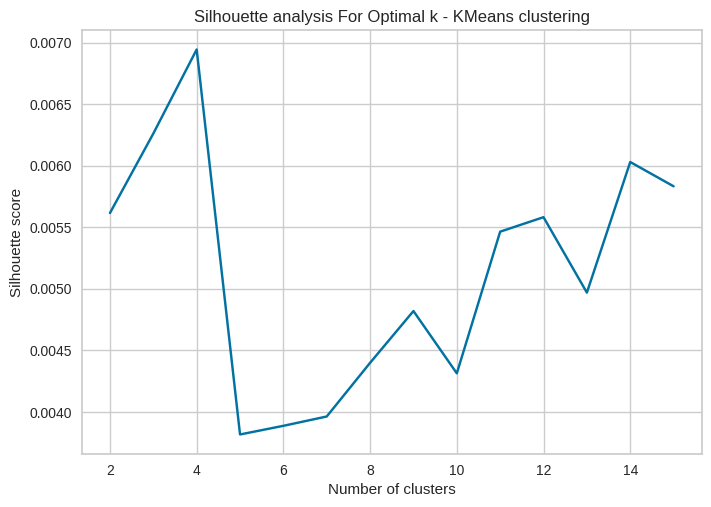

In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

Six emerges victorious! K-means clustering finds 6 optimal groups with the highest Silhouette score.

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6317.2287751150125, 0.0037383265871585784)


In [ ]:
# Adding a kmeans cluster number attribute
netflix_df['kmeans_cluster'] = kmeans.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

type                        title                        director  \
3023    Movie    Instructions Not Included                  Eugenio Derbez   
2502    Movie                 Gosford Park                   Robert Altman   
4941  TV Show        Power Rangers Samurai                                   
3159    Movie  Jesus: Countdown to Calvary                     Gerry Hoban   
4813    Movie                  Peepli Live  Anusha Rizvi, Mahmood Farooqui   

                                                   cast  \
3023  Eugenio Derbez, Jessica Lindsey, Loreto Peralt...   
2502  Eileen Atkins, Bob Balaban, Alan Bates, Charle...   
4941  Alex Heartman, Erika Fong, Hector David Jr., N...   
3159                                    Hugh Bonneville   
4813  Omkar Das Manikpuri, Raghuvir Yadav, Malaika S...   

                                   country rating  \
3023                                Mexico  PG-13   
2502  United States, United Kingdom, Italy      R   
4941                         United States  TV-Y7   
3159        Ireland, United States, France  TV-14   
4813                                 India  TV-MA   

                                   listed_in  \
3023  Comedies, Dramas, International Movies   
2502  Comedies, Dramas, International Movies   
4941                                Kids' TV   
3159     Documentaries, Faith & Spirituality   
4813    Comedies, Dramas, Independent Movies   

                                            description  kmeans_cluster  
3023  Unable to locate the elusive mother of a baby ...               1  
2502  In this witty whodunit, wealthy guests and the...               3  
4941  A new generation of Power Rangers must master ...               3  
3159  Host Hugh Bonneville traces Jesus' last days t...               5  
4813  Two indigent farmers consider suicide so that ...               1

**Number of movies and TV Shows in each cluster:**

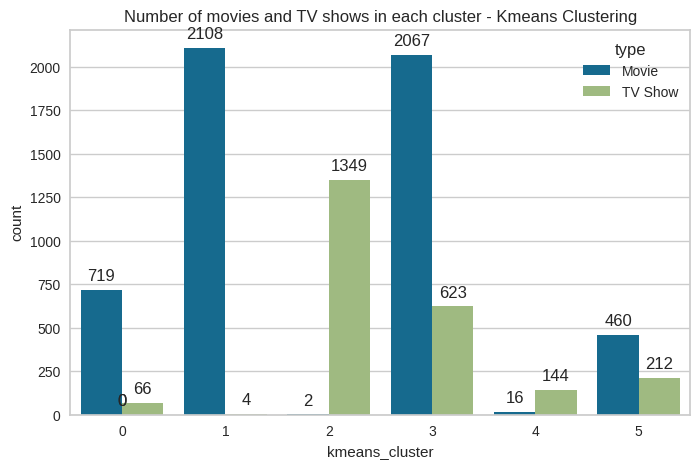

In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(8, 5))
graph = sns.countplot(x='kmeans_cluster', data=netflix_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# Adding value count on the top of each bar
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Building wordcloud for different clusters:**

In [ ]:
#function for Building a wordcloud for the movie/shows

def kmeans_worldcloud(cluster_number, column_name):

  netflix_df_wordcloud = netflix_df[['kmeans_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Word Cloud on "title" column for different clusters:

cluster 0


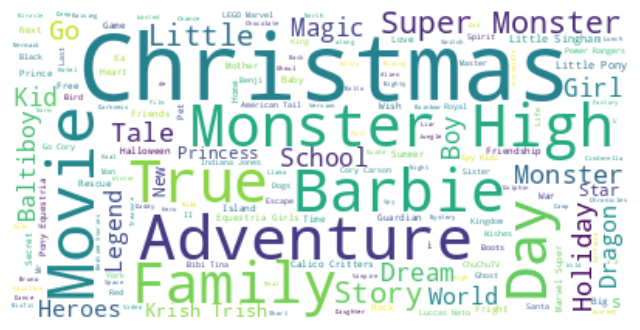

cluster 1


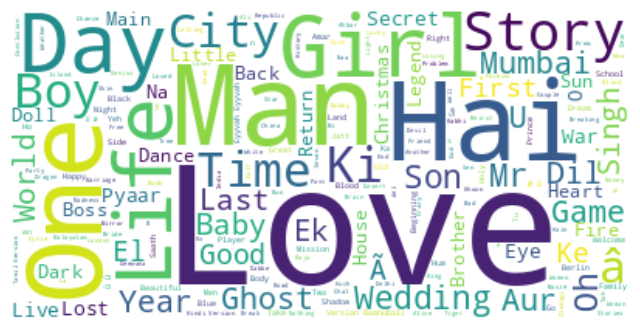

cluster 2


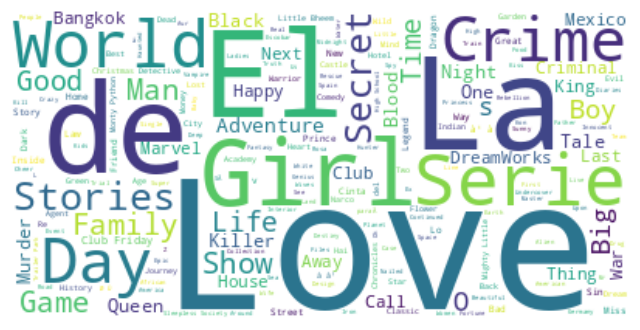

cluster 3


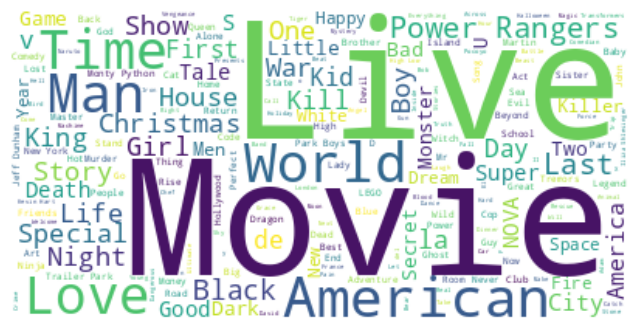

cluster 4


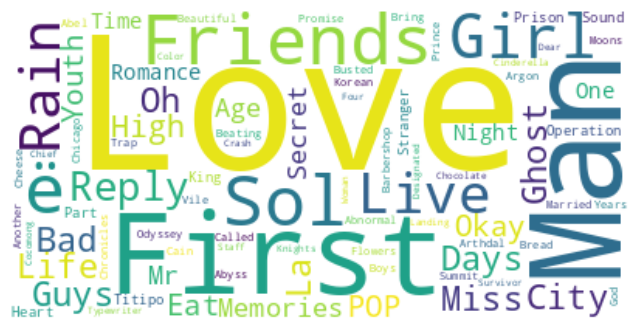

cluster 5


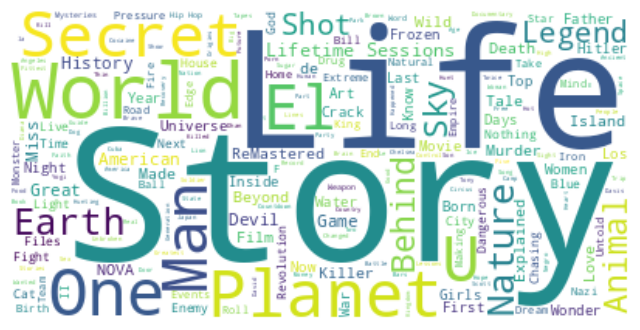

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

**Mission: Accomplished!** K-means successfully grouped movies and TV Shows into 6 distinct clusters.

## **(b). Hierarchical clustering**

Hierarchical clustering offers an alternative to K-means. It tackles the same challenge – grouping similar data points – but in a tree-like structure. Imagine data points progressively merging based on their similarities, forming a hierarchy of clusters. This approach allows for exploring different cluster granularities, providing valuable insights into the data's organization.

Within hierarchical clustering, two main approaches emerge: agglomerative and divisive. Imagine starting with individual data points (agglomerative) or a single large cluster (divisive). Agglomerative works its way up, merging the closest clusters iteratively. Divisive, on the other hand, takes a top-down approach, splitting clusters progressively based on their differences. Both methods offer unique perspectives on how data points naturally group together.

Hierarchical clustering unfolds its story through a visual map called a dendrogram. This tree-like structure lets you trace the merging or splitting of clusters, making it easy to grasp the hierarchical relationships within the data

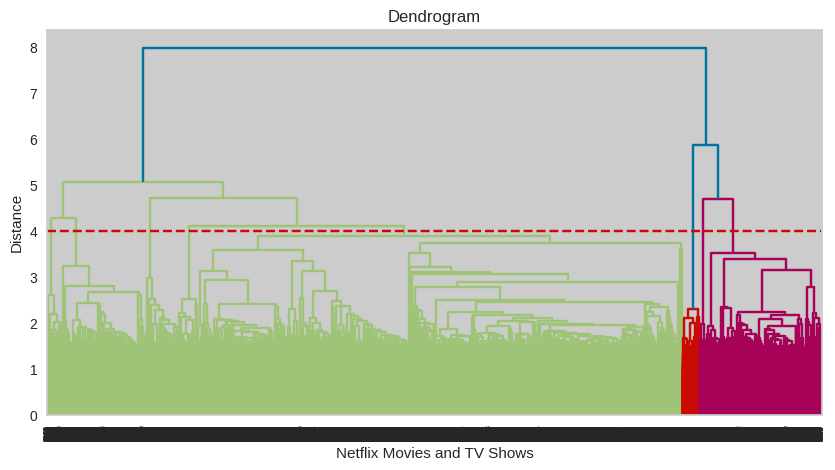

In [ ]:
# Building a dendogram to decide the number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Movies and TV Shows')
plt.ylabel('Distance')
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

**Conclusion**: As we can see from the graph, the agglomerative clustering algorithm identified 7 distinct clusters within a threshold distance of 4 units.

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Adding a hierarchical cluster number attribute
netflix_df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                      title               director  \
7059  Movie      Thor: Tales of Asgard                Sam Liu   
2322  Movie    Ä°stanbul KÄ±rmÄ±zÄ±sÄ±        Ferzan Ãzpetek   
2363  Movie  Gatao 2: Rise of the King          Yen Cheng-kuo   
688   Movie                Bad Boys II            Michael Bay   
2610  Movie             Happy Go Lucky  Amarpreet G S Chabbra   

                                                   cast  \
7059  Matthew Wolf, Rick Gomez, Tara Strong, Alistai...   
2322  Halit ErgenÃ§, Nejat Ä°Åler, Mehmet GÃ¼nsÃ¼r,...   
2363  Collin Chou, Jason Wang, Jack Kao, Tsai Chen-n...   
688   Will Smith, Martin Lawrence, Jordi MollÃ , Gab...   
2610  Amrinder Gill, Harish Verma, Sumeet Sandhu, Gu...   

                    country rating  \
7059  United States, Canada  TV-Y7   
2322          Italy, Turkey  TV-MA   
2363                 Taiwan  TV-MA   
688           United States      R   
2610                  India  TV-14   

                                             listed_in  \
7059                          Children & Family Movies   
2322  Dramas, Independent Movies, International Movies   
2363  Action & Adventure, Dramas, International Movies   
688                       Action & Adventure, Comedies   
2610  Comedies, International Movies, Music & Musicals   

                                            description  hierarchical_cluster  
7059  Thor, the Marvel comic book character, comes t...                     0  
2322  Upon his return to Istanbul, an expat writer-e...                     0  
2363  When a zealous gang leader plans to take out a...                     1  
688   In this hyperkinetic sequel, a pair of Miami n...                     0  
2610  Three sisters seem to be ideal brides for thre...                     3

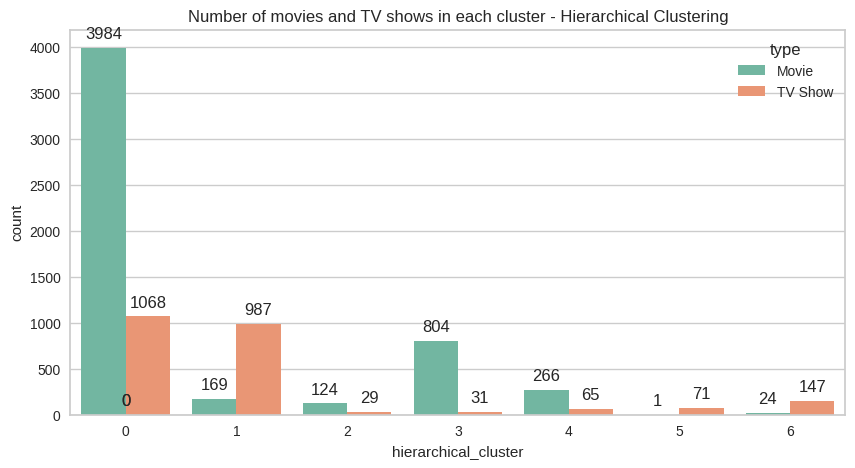

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10, 5))
graph = sns.countplot(x='hierarchical_cluster', data=netflix_df, hue='type', palette="Set2")
plt.title('Number of movies and TV shows in each cluster - Hierarchical Clustering')

# Adding value count on the top of each bar
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Building wordclouds for different clusters in hierarchical Clustering:**

In [ ]:
#function for Building a wordcloud for the movie/shows'''
def hierarchical_worldcloud(cluster_number, column_name):

  netflix_df_wordcloud = netflix_df[['hierarchical_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "cast" column for different cluster**

cluster 0


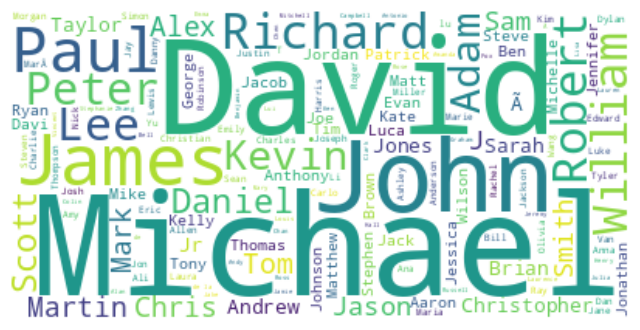

cluster 1


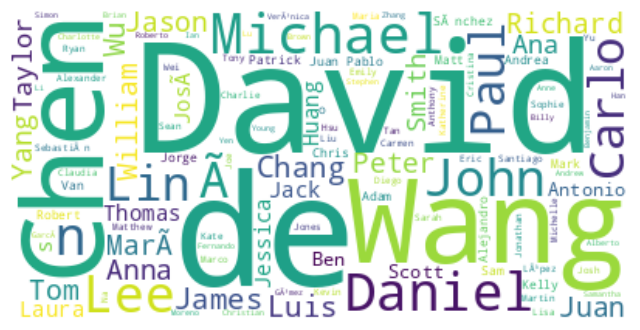

cluster 2


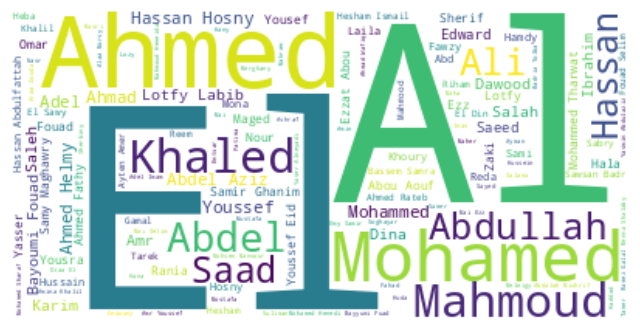

cluster 3


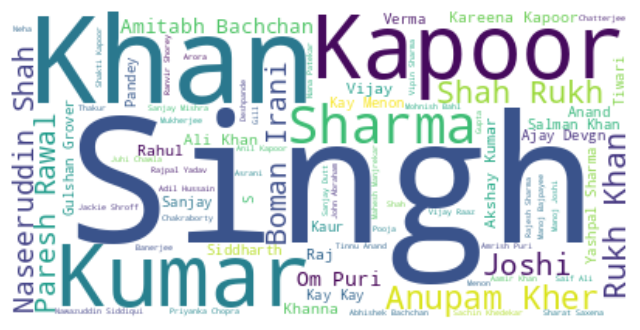

cluster 4


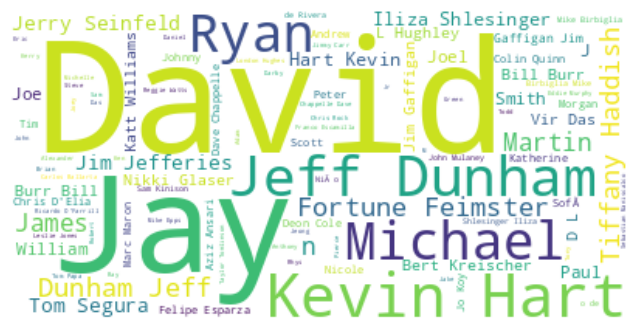

cluster 5


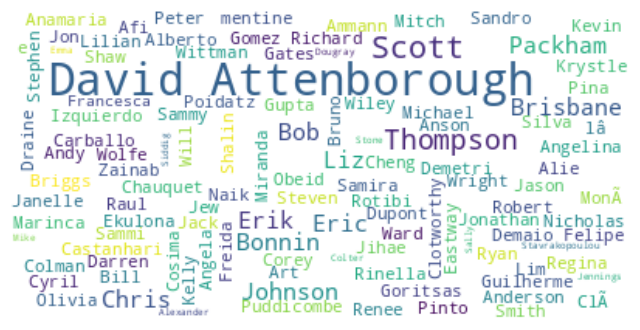

cluster 6


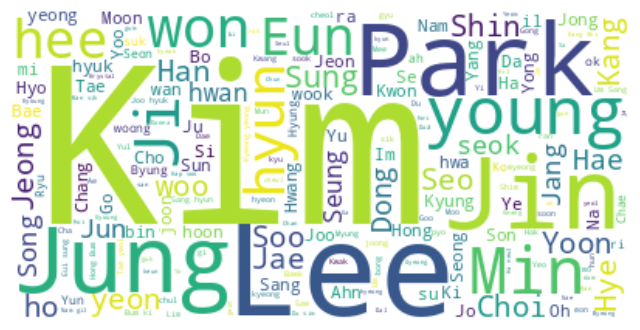

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Mission: Accomplished!** Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

# **7.Recommendation System**

Imagine a recommendation system that understands your taste based on what you've already enjoyed. That's the power of content-based filtering! This system analyzes the features of items you've liked (movies, music, books, etc.) and uses those characteristics to suggest similar options. Think of it like recommending a new book based on the genre, author, or themes you enjoyed in a previous read. By focusing on item attributes, content-based systems strive to connect you with content that aligns with your existing preferences.


*   Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
*   The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.



In [ ]:
# veryfying index
netflix_df[['show_id', 'title', 'text_data']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                              text_data  
0     joã£o miguel bianca comparato michel gome rodo...  
1     jorg michel graudemiã¡n bichir hã©ctor bonilla...  
2     gilbert chantedd chan stella chung henley hii ...  
3     shane ackerelijah wood john c reilli jennif co...  
4     robert luketicjim sturgess kevin spacey kate b...  
...                                                 ...  
7782  josef faresimad creidi antoinett turk elia ger...  
7783  mozez singhvicki kaushal sarahjan dia raaghav ...  
7784  nasti c tvmadocumentari intern movi music musi...  
7785  adriano zumbo rachel khooaustraliatvpgintern t...  
7786  sam dunn unit kingdom canada unit statestvmado...  

[7770 rows x 3 columns]

Our data journey begins with a dataframe containing 7770 rows. However, this number doesn't quite tell the whole story. Some rows were eliminated while handling missing values, resulting in a gap between the number of rows (7770) and the last index (7786). To ensure our content-based recommendation system functions smoothly, we need consistent indexing.

Here's why: This system relies on a specific index within the "tags" column to calculate similarity scores. These scores determine how closely items (like movies) resemble each other based on their tags (genres, actors, etc.). If we don't reset the index, there's a risk of calculating similarity scores based on the wrong index positions. This would lead to inaccurate recommendations, potentially suggesting movies completely unrelated to our preferences.

To avoid this confusion and ensure our recommendations hit the mark, we've simply reset the index. This creates a clean and consistent foundation for calculating similarity scores and ultimately, building a recommendation system that can connect you with the movies you'll truly enjoy.




In [ ]:
# defining new dataframe for building recommandation system
recommender_df = netflix_df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'text_data']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                              text_data  
0     joã£o miguel bianca comparato michel gome rodo...  
1     jorg michel graudemiã¡n bichir hã©ctor bonilla...  
2     gilbert chantedd chan stella chung henley hii ...  
3     shane ackerelijah wood john c reilli jennif co...  
4     robert luketicjim sturgess kevin spacey kate b...  
...                                                 ...  
7765  josef faresimad creidi antoinett turk elia ger...  
7766  mozez singhvicki kaushal sarahjan dia raaghav ...  
7767  nasti c tvmadocumentari intern movi music musi...  
7768  adriano zumbo rachel khooaustraliatvpgintern t...  
7769  sam dunn unit kingdom canada unit statestvmado...  

[7770 rows x 3 columns]

Clean slate, big plans! By resetting the index (check the dataframe!), we've prepared the data for building a content-based recommendation system, ready to suggest movies you'll love.

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {netflix_df[netflix_df['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zozo'].index[0]}")

before reset index id for movie 'Zero' : 7782
after reset index id for movie 'Zero': 7765


In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 0.15962804, -0.00829159, -0.00639078, ..., -0.00623548,
         0.00596567, -0.00286121],
       [-0.04123623,  0.01764676, -0.01684909, ...,  0.00207993,
        -0.00860138,  0.00286888],
       [-0.04088995,  0.03203453,  0.05528454, ...,  0.01084766,
        -0.00697707, -0.02202501],
       ...,
       [-0.06593344,  0.00433239, -0.0742992 , ...,  0.00678882,
        -0.00228952, -0.01235286],
       [ 0.05460396, -0.03218019, -0.03266406, ..., -0.02319848,
         0.00266591, -0.00185179],
       [-0.07306776, -0.14821472, -0.15749224, ...,  0.00308698,
         0.01365903,  0.00102552]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.07984237,  0.02066374, ..., -0.02094408,
         0.00346093, -0.01811102],
       [ 0.07984237,  1.        , -0.00521934, ...,  0.05854221,
        -0.01212751, -0.01157077],
       [ 0.02066374, -0.00521934,  1.        , ..., -0.00339192,
        -0.00973836, -0.01770215],
       ...,
       [-0.02094408,  0.05854221, -0.00339192, ...,  1.        ,
        -0.00619756,  0.11975314],
       [ 0.00346093, -0.01212751, -0.00973836, ..., -0.00619756,
         1.        ,  0.03890455],
       [-0.01811102, -0.01157077, -0.01770215, ...,  0.11975314,
         0.03890455,  1.        ]])

In [ ]:
# This function list down top ten movies on the basis of similarity score for that perticular movie.

def recommend(movie):

    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(netflix_df.iloc[i[0]].title)

In [ ]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Bhool Bhulaiyaa
Chup Chup Ke
Ready
Khushi
Golmaal: Fun Unlimited
Thank You
Bhagam Bhag
Hasee Toh Phasee
Humko Deewana Kar Gaye
Hattrick


In [ ]:
recommend('MINDHUNTER')

If you liked 'MINDHUNTER', you may also enjoy: 

Cold Case Files Classic
Cold Case Files
Bitten
Fear City: New York vs The Mafia
Deep Undercover Collection
Haven
Inside the Criminal Mind
Scream
Nurses Who Kill
The Most Unknown


**Mission accomplished:** Movie recommendations are flowing!

# ***8.Conclusion:***

This project delved into the world of Netflix shows, using text clustering techniques to unlock hidden connections. I grouped shows based on their descriptions, ensuring those within a cluster share similar themes, genres, or styles. This allows us to explore the vast Netflix library more effectively and identify shows viewers might enjoy based on their past preferences.



*   **Content Treasure Trove**: I Dived into a dataset of 7,787 records, each described by 11 informative attributes.
*   **Data prep & exploration**: Our journey began by cleaning the data and performing EDA to get a feel for the Netflix shows and Movies.
* **Netflix Unveiled: Movies Reign, Shows on the Rise!** :Data reveals Netflix boasts more movies, with new shows rapidly joining the party. Interestingly, US-made content dominates the show selection.
* **Untangling the Netflix Universe**: To group similar shows together, I focused on key attributes like cast, genre, and director. Then, a special technique called TF-IDF transformed these details into numerical data, making it easier for our analysis to reveal hidden connections.
* **Unveiling the Show Similarities: A TF-IDF Adventure!**: While TF-IDF initially created a massive web of 10,000 features to capture the show descriptions, we encountered the "curse of dimensionality." To combat this, I employed Principal Component Analysis (PCA), a clever technique that identified the most important features. Remarkably, just 3,000 components were able to hold onto over 80% of the information! By focusing on these key elements, I streamlined the data and empowered our analysis to find hidden relationships between these fascinating Netflix shows.
* **Finding the Perfect Fit: K-Means Unveils 6 Show Clusters**: To group shows with similar characteristics, I used K-Means clustering. But how many clusters? By analyzing the "elbow method" and "Silhouette score," I discovered 6 clusters provided the most optimal fit for organizing the Netflix shows!
* **Branching Out - Unveiling 7 Show Groups with Hierarchical Clustering**: I also explored hierarchical clustering to discover natural groupings. By examining the branching structure of the dendrogram, I identified 7 optimal clusters, offering an alternative lens into the Netflix show landscape.
* **Finding Your Next Binge - Unveiling a Content-Based Recommendation System!**: I built a recommendation system that understands shows! It uses a technique called "cosine similarity" to analyze show descriptions and recommend 10 similar options based on what you've watched before. Get ready to discover hidden gems you'll love!


# **Project complete! Ready to explore the Netflix landscape.**